In [1]:
import os
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from matplotlib import colors
from tqdm import tqdm
from bg_atlasapi.bg_atlas import BrainGlobeAtlas
from braintracer.braintracer.analysis import _get_area_index
from braintracer.braintracer.analysis import children_from

In [2]:
import skimage

In [3]:
names = ['SC013', 'SC015', 'SC020', 'SC022', 'SC014', 'SC023', 'SC048', 'SC049']
channel_signal_name = 'r'
channel_background_name = 'b'
network_nickname = 'bt14'
atlas = BrainGlobeAtlas('allen_mouse_10um')

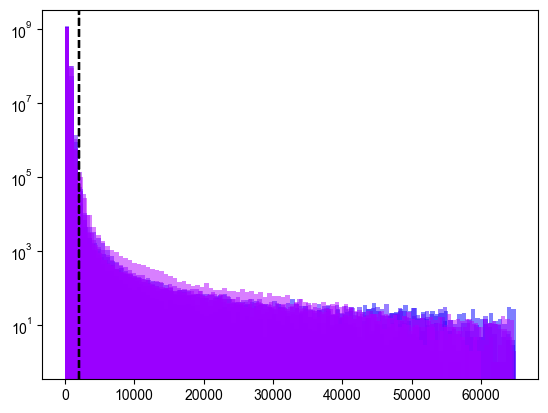

In [25]:
for i, name in enumerate(names):
    backg = imread(f'braintracer/downsampled_data/reg_{name}_{channel_background_name}.tiff')
    plt.hist(backg.flatten(), bins=100, fc=(0 + (0.1 * i), 0, 1, 0.5))
    plt.yscale('log')
    plt.axvline(2000, color='k', ls='--')

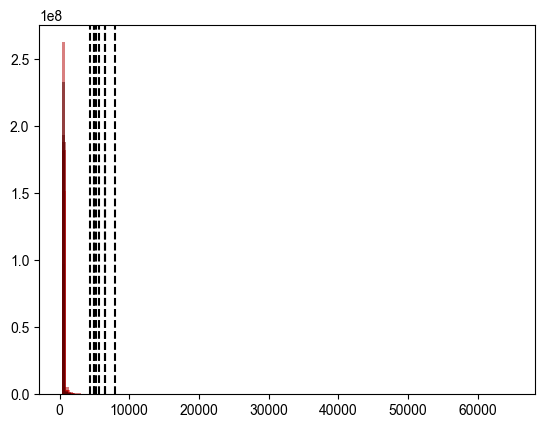

In [10]:
for i, name in enumerate(names):
    foreg = imread(f'braintracer/downsampled_data/reg_{name}_{channel_signal_name}.tiff')
    plt.hist(foreg[foreg > 300].flatten(), bins=100, fc=(1 - (0.1 * i), 0, 0, 0.5))
    #plt.yscale('log')
    val = skimage.filters.threshold_otsu(foreg)
    plt.axvline(val, color='k', ls='--')

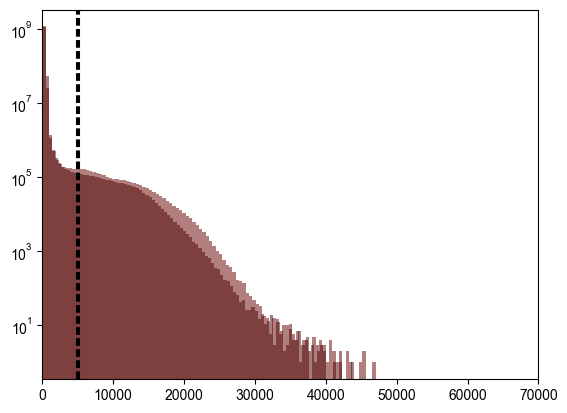

In [17]:
for i, name in enumerate(names):
    if name == 'SC048' or name == 'SC049':
        foreg = imread(f'braintracer/downsampled_data/reg_{name}_{channel_signal_name}.tiff')
        plt.hist(foreg.flatten(), bins=100, fc=(1 - (0.1 * i), 0, 0, 0.5))
        plt.yscale('log')
        plt.xlim(0,70_000)
        val = skimage.filters.threshold_otsu(foreg)
        plt.axvline(val, color='k', ls='--')

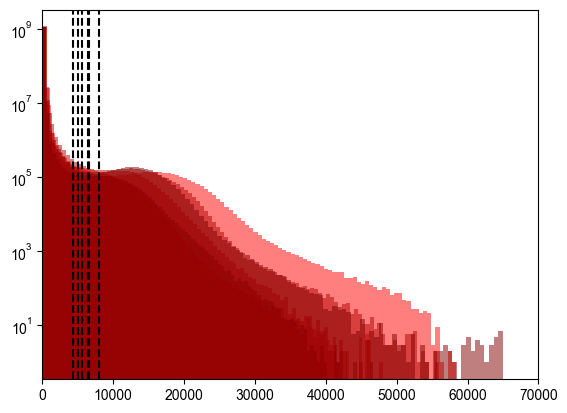

In [18]:
for i, name in enumerate(names):
    if name != 'SC048' and name != 'SC049':
        foreg = imread(f'braintracer/downsampled_data/reg_{name}_{channel_signal_name}.tiff')
        plt.hist(foreg.flatten(), bins=100, fc=(1 - (0.1 * i), 0, 0, 0.5))
        plt.yscale('log')
        plt.xlim(0,70_000)
        val = skimage.filters.threshold_otsu(foreg)
        plt.axvline(val, color='k', ls='--')

In [7]:
for name in names:
    foreg = imread(f'braintracer/downsampled_data/reg_{name}_{channel_signal_name}.tiff')
    print(np.std(foreg[foreg != 0].flatten()), np.std(foreg.flatten()))

1197.0594844715672 878.6414528059803
582.2499803468919 469.7860838456893
760.4179359690141 590.1833357344276
1044.658557912037 779.1386387932191
602.2360553945042 457.285975845779
897.1250166626047 689.3872471524481
661.3702456861749 529.89116945526
565.8279828688537 458.65196997054755


In [49]:
name = 'SC023'

865.0


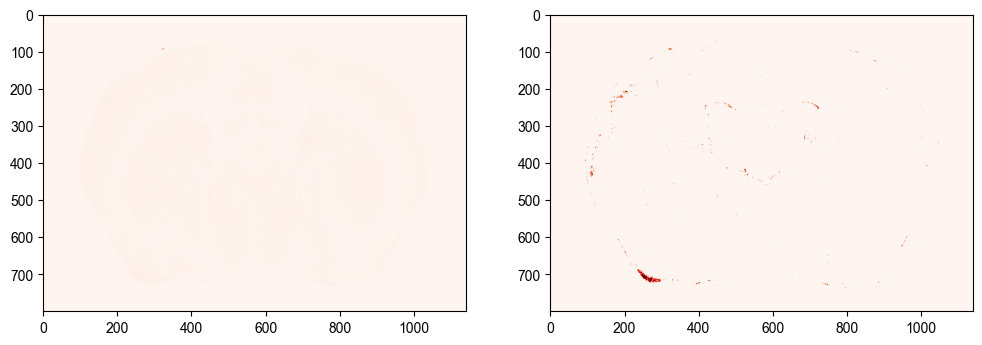

In [63]:
backg = imread(f'braintracer/downsampled_data/reg_{name}_{channel_background_name}.tiff')
q3 = np.quantile(backg, 0.995)
print(q3)
im = backg[554]

imb = (im > q3).astype(int)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.imshow(im, vmin=0, cmap='Reds')
ax2.imshow(imb, vmin=0, cmap='Reds')

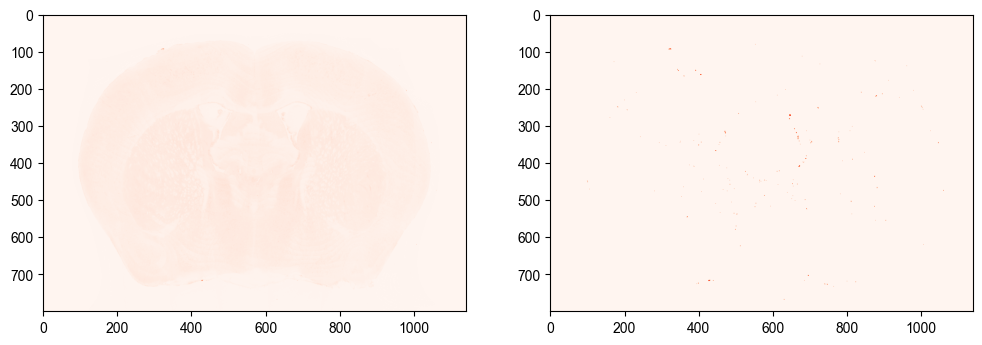

In [64]:
foreg = imread(f'braintracer/downsampled_data/reg_{name}_{channel_signal_name}.tiff')
#val = skimage.filters.threshold_otsu(foreg)
#print(val)
q3 = np.quantile(foreg, 0.99)

im = foreg[554]
imf = (im > q3).astype(int)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.imshow(im, vmin=0, cmap='Reds')
ax2.imshow(imf, vmin=0, cmap='Reds')

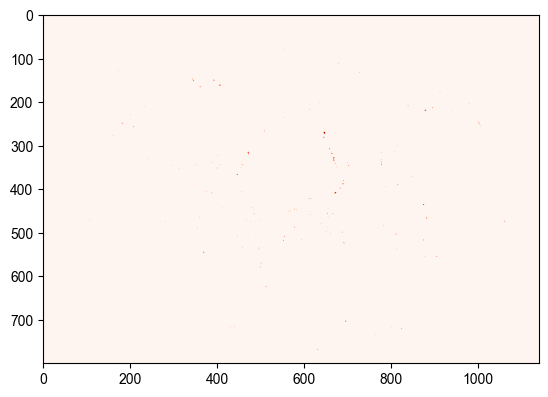

In [65]:
imfinal = np.subtract(imf, imb)
imfinal = (imfinal > 0).astype(int)
plt.imshow(imfinal, cmap='Reds')

In [5]:
for name in names:
    if name == 'SC014':
        foreg = imread(f'braintracer/downsampled_data/reg_{name}_{channel_signal_name}.tiff')
        thresh_f = np.quantile(foreg, 0.99) # 0.99
        backg = imread(f'braintracer/downsampled_data/reg_{name}_{channel_background_name}.tiff')
        thresh_b = np.quantile(backg, 0.995) # 0.995
    
        im_b = (backg > thresh_b).astype(int)
        skimage.io.imsave(f'testb_{name}.tiff', im_b)
    
        im_f = (foreg > thresh_f).astype(int)
        skimage.io.imsave(f'testf_{name}.tiff', im_f)
    
        imfinal = np.subtract(im_f, im_b)
        imfinal = (imfinal > 0).astype(int)
        skimage.io.imsave(f'testfinal_{name}.tiff', imfinal)

C:\Users\Sam\AppData\Local\Temp\ipykernel_16664\809662730.py:9: UserWarning: testb_SC049.tiff is a low contrast image
  skimage.io.imsave(f'testb_{name}.tiff', im_b)
C:\Users\Sam\AppData\Local\Temp\ipykernel_16664\809662730.py:12: UserWarning: testf_SC049.tiff is a low contrast image
  skimage.io.imsave(f'testf_{name}.tiff', im_f)
C:\Users\Sam\AppData\Local\Temp\ipykernel_16664\809662730.py:16: UserWarning: testfinal_SC049.tiff is a low contrast image
  skimage.io.imsave(f'testfinal_{name}.tiff', imfinal)


Normalisation

In [49]:
# include the raw image stack channels and the cellfinder output file in the NAME directory
NAME = 'SC049'
channel_signal_name = 'r'
channel_background_name = 'b'
network_nickname = 'bt14'
atlas = BrainGlobeAtlas('allen_mouse_10um')

In [50]:
foreg = imread(f'braintracer/downsampled_data/reg_{NAME}_{channel_signal_name}.tiff')
backg = imread(f'braintracer/downsampled_data/reg_{NAME}_{channel_background_name}.tiff')
foreg.shape, backg.shape

((1320, 800, 1140), (1320, 800, 1140))

In [51]:
def fit_model(model, y, x, name, ax=None):
    X = np.array(x).reshape(len(x),1)
    line_X = np.arange(min(x), max(x))[:, np.newaxis]
    model.fit(X, y)
    line_y = model.predict(line_X)
    try:
        if ax != None:
            ax.plot(line_X, line_y, color='r', linewidth=1, label=name)
        return model.coef_, model.intercept_
    except Exception:
        if ax != None:
            ax.plot(line_X, line_y, color='m', linewidth=1, label=name)
        return model.estimator_.coef_, model.estimator_.intercept_

def get_subtraction_coeffs(ax):
    ref_vals = backg.flatten()[::10_000] # every 1000 values of the array
    sig_vals = foreg.flatten()[::10_000] # same coordinates chosen from both image stacks

    if ax != None:
        ax.hist2d(ref_vals, sig_vals, bins=500, cmap=plt.cm.jet, norm=colors.LogNorm())
        ax.set_ylim(0,7000)
        ax.set_xlim(0,2000)

    ransac = linear_model.RANSACRegressor(max_trials=30)
    m, c = fit_model(ransac, sig_vals, ref_vals, 'RANSAC', ax=ax)
    m = m[0] # extract from array
    return m, c

Subtraction parameters are: m=0.59501625963929, c=2.755076870539625


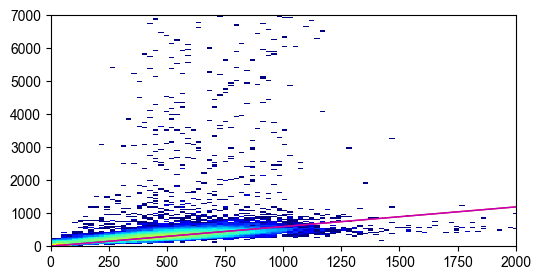

In [52]:
f, ax = plt.subplots(figsize=(6,3))
m, c = get_subtraction_coeffs(ax)
#plt.savefig(f'fit.png', dpi=600, bbox_inches='tight')
print(f'Subtraction parameters are: m={m}, c={c}')

In [53]:
subtracted_im = foreg[0] - ((backg[0] * m) + c)

In [54]:
subtracted_im.shape

(800, 1140)

In [55]:
for i in tqdm(range(1, len(foreg))):
    subtracted_im = np.append(subtracted_im, foreg[i] - ((backg[i] * m) + c), axis=0)

100%|███████████████████████████████████████████████████████████████████████████| 1319/1319 [32:01<00:00,  1.46s/it]


In [56]:
subtracted_im = subtracted_im.reshape(1320, 800, 1140)

In [57]:
subtracted_im.shape

(1320, 800, 1140)

<matplotlib.colorbar.Colorbar object at 0x000001F63C3F4B20>

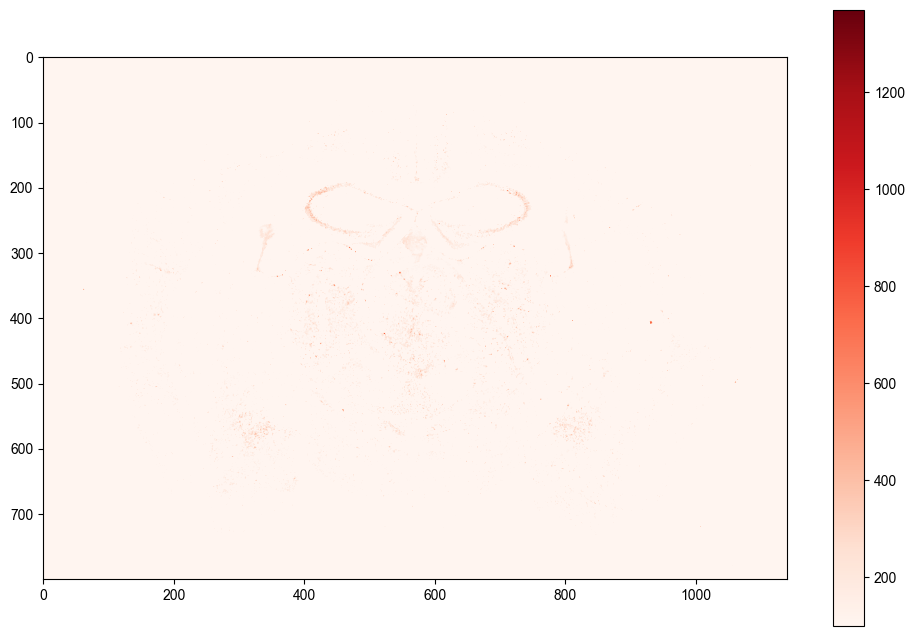

In [71]:
plt.subplots(figsize=(6,6))
plt.imshow(subtracted_im[650], vmin=100, cmap='Reds')
plt.colorbar()

## Save subtracted downsampled image

In [13]:
dir_path = 'braintracer/fluorescence/'
if not os.path.isdir(dir_path):
    os.makedirs(dir_path)
dest = dir_path + f'subtracted_registered_{NAME}_{channel_signal_name}'
np.save(dest, subtracted_im)

## Sum downsampled pixels in cerebellar cortex

In [14]:
parent, children = children_from(528, depth=0)
areas = [parent] + children

In [15]:
total_fluorescence = 0
for z in tqdm(range(subtracted_im.shape[0])):
    for y in range(subtracted_im.shape[1]):
        for x in range(subtracted_im.shape[2]):
            if _get_area_index(z, y, x) in areas:
                total_fluorescence += subtracted_im[z, y, x]

100%|███████████████████████████████████████████████████████████████████████████| 1320/1320 [23:20<00:00,  1.06s/it]


In [16]:
total_fluorescence

53201703701.45266

In [17]:
total_fluorescence / 1_000_000_000
# billions of fluorescence brightness units in cortex

53.20170370145266